**Opis skupa podataka, i problema koji rešavamo**

Skup podataka je nad kojim ćemo demonstrirati rad modela je iz paketa LETOR 4.0 koji sadrži skupove podataka za rangiranje. Ova verzija paketa dostupna je od 2009. godine. Ona koristi kolekciju  Gov2 web stranica (oko 25 miliona stranica) i dva skupa upita iz Million Query Track , tkzv. skupove upita TREC 2007 i
TREC 2008. Ova dva skupa upita označeni su sa  MQ2007 i MQ2008. MQ2007 sadrži oko 1700 različitih upita, dok  MQ2008 sadrži oko 800 upita sa označenim dokumentima. Paket LETOR4.0 sadrži 8 skupova podataka za različita rangiranja podeljenih u dva skupa upita i Gov2 kolekcije stranica. Svaki od skupova sadrži 5 foldera, u svakom folderu postoje tri podskupa, za trening, validaciju i test.
Mi ćemo koristiti MQ2008 skup podataka za nadgledano učenje. Sam skup podataka koji koristimo generisan je tako da je svaka vrsta par dokument i upit. Prva kolona je oznaka relevantnosti para dokument-upit, što će nam i biti ciljna vrednost, druga kolona je id upita, zatim sledi 46 kolona koje su atributi koji opisuju par dokument - upit, nakon toga sledi kolona koja sadrži id dokumenta kao i komentar o posmatranom paru.  Sledi lista sa atributima koji opisuju par dokument-upit:


1.   TF(Term frequency) of body
2.   TF of anchor
3.   TF of title
4.   TF of URL
5.   TF of whole document
6.   IDF(Inverse document frequency) of body
7.   IDF of anchor
8.   IDF of title
9.   IDF of URL
10.  IDF of whole document
11.  TF*IDF of body
12.  TF*IDF of anchor
13.  TF*IDF of title
14.  TF*IDF of URL
15.  TF*IDF of whole document
16.  DL(Document length) of body
17.  DL of anchor
18.  DL of title
19.  DL of URL
20.  DL of whole document
21.  BM25 of body
22.  BM25 of anchor
23.  BM25 of title
24.  BM25 of URL
25.  BM25 of whole document
26.  LMIR.ABS of body
27.  LMIR.ABS of anchor
28.  LMIR.ABS of title
29.  LMIR.ABS of URL
30.  LMIR.ABS of whole document
31.  LMIR.DIR of body
32.  LMIR.DIR of anchor
33.  LMIR.DIR of title
34.  LMIR.DIR of URL
35.  LMIR.DIR of whole document
36.  LMIR.JM of body
37.  LMIR.JM of anchor
38.  LMIR.JM of title
39.  LMIR.JM of URL
40.  LMIR.JM of whole document
41.  PageRank
42.  Inlink number
43.  Outlink number
44.  Number of slash in URL
45.  Length of URL
46.  Number of child page

Opis atributa i način na koji su generisani dostupni su u zvaničnoj dokumentaciji, više informacija dostupno je na strani [link](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/). 
Lista atributa  sadrži različite karakteristike odnosa upita i dokumenta, npr. prvi atribut je frekvencija pojavljivanja reči iz upita u telu dokumenta, slično i drugi atributi opisuju odnos upita i dokumenta i svi su numeričkog tipa. Dalje sledi jedan primer para dokument-upit:



0 qid:18219 1:0.052893 2:1.000000 3:0.750000 4:1.000000 5:0.066225 6:0.000000 7:0.000000 8:0.000000 9:0.000000 10:0.000000 11:0.047634 12:1.000000 13:0.740506 14:1.000000 15:0.058539 16:0.003995 17:0.500000 18:0.400000 19:0.400000 20:0.004121 21:1.000000 22:1.000000 23:0.974510 24:1.000000 25:0.929240 26:1.000000 27:1.000000 28:0.829951 29:1.000000 30:1.000000 31:0.768123 32:1.000000 33:1.000000 34:1.000000 35:1.000000 36:1.000000 37:1.000000 38:1.000000 39:0.998377 40:1.000000 41:0.333333 42:0.434783 43:0.000000 44:0.396910 45:0.447368 46:0.966667 #docid = GX004-93-7097963 inc = 0.0428115405134536 prob = 0.860366



In [1]:
from google.colab import files
uploaded = files.upload()

Saving trans_data.py to trans_data.py


In [2]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing
import lightgbm as lgb
from scipy.stats import spearmanr
from sklearn import metrics
from time import perf_counter

Učitavanje podataka iz datoteke trans_data.py:

In [3]:
! wget https://s3-us-west-2.amazonaws.com/xgboost-examples/MQ2008.rar
! unrar x MQ2008.rar
! mv -f MQ2008/Fold1/*.txt .
# convert data format
! python trans_data.py train.txt mq2008.train mq2008.train.group
! python trans_data.py test.txt mq2008.test mq2008.test.group
! python trans_data.py vali.txt mq2008.vali mq2008.vali.group

--2020-09-06 20:37:55--  https://s3-us-west-2.amazonaws.com/xgboost-examples/MQ2008.rar
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.251.32
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.251.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15448795 (15M) [application/x-rar-compressed]
Saving to: ‘MQ2008.rar’

MQ2008.rar          100%[===================>]  14.73M  9.04MB/s    in 1.6s    

2020-09-06 20:37:57 (9.04 MB/s) - ‘MQ2008.rar’ saved [15448795/15448795]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from MQ2008.rar

Creating    MQ2008                                                    OK
Creating    MQ2008/Fold1                                              OK
Extracting  MQ2008/Fold1/test.txt                                          0%  1%  2%  OK 
Extracting  MQ2008/Fold1/train.txt                                         2%  3% 

In [4]:
x_train, y_train = load_svmlight_file("mq2008.train")
x_valid, y_valid = load_svmlight_file("mq2008.vali")
x_test, y_test = load_svmlight_file("mq2008.test")

In [5]:
q_train = np.loadtxt('mq2008.train.group')
q_valid = np.loadtxt('mq2008.vali.group')
q_test = np.loadtxt('mq2008.test.group')



> **Kreiranje i treniranje modela**


Koristićemo funkciju LGBMRanker() biblioteke lightgbm za kreiranje "rankera". 
GBM u nazivu dolazi od engleskog Gradient Boosting Machine. LightGBM je frejmvork koji koristi algoritme učenja bazirane na drvima.
Tokom treniranja ispisuje se rezultat svake instance.

In [6]:
gbm = lgb.LGBMRanker()
start_training = perf_counter()
gbm.fit(x_train, y_train, group=q_train, eval_set=[(x_valid, y_valid)],
eval_group=[q_valid], eval_at=[1, 3], early_stopping_rounds=20, verbose=True,
callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.95 ** x * 0.1)])
end_training = perf_counter()

[1]	valid_0's ndcg@1: 0.556263	valid_0's ndcg@3: 0.635254
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's ndcg@1: 0.571125	valid_0's ndcg@3: 0.66308
[3]	valid_0's ndcg@1: 0.617834	valid_0's ndcg@3: 0.675826
[4]	valid_0's ndcg@1: 0.622081	valid_0's ndcg@3: 0.682879
[5]	valid_0's ndcg@1: 0.632696	valid_0's ndcg@3: 0.6769
[6]	valid_0's ndcg@1: 0.624204	valid_0's ndcg@3: 0.677868
[7]	valid_0's ndcg@1: 0.613588	valid_0's ndcg@3: 0.671651
[8]	valid_0's ndcg@1: 0.613588	valid_0's ndcg@3: 0.670299
[9]	valid_0's ndcg@1: 0.626327	valid_0's ndcg@3: 0.675637
[10]	valid_0's ndcg@1: 0.62845	valid_0's ndcg@3: 0.680989
[11]	valid_0's ndcg@1: 0.62845	valid_0's ndcg@3: 0.679431
[12]	valid_0's ndcg@1: 0.626327	valid_0's ndcg@3: 0.684499
[13]	valid_0's ndcg@1: 0.641189	valid_0's ndcg@3: 0.688833
[14]	valid_0's ndcg@1: 0.619958	valid_0's ndcg@3: 0.688054
[15]	valid_0's ndcg@1: 0.619958	valid_0's ndcg@3: 0.686626
[16]	valid_0's ndcg@1: 0.626327	valid_0's ndcg@3: 0.691959
[17]	val

In [7]:
print('Vreme treniranja u sekundama: ', end_training - start_training)

Vreme treniranja u sekundama:  0.48925605400000904


Ako je trening uspešan trebalo bi da uočimo korelaciju između rezultata relevantnosti svake instance u trening skupu i predviđenog rezultata.

In [8]:
y_predicted_train = gbm.predict(x_train)
spearmanr(y_train, y_predicted_train)

SpearmanrResult(correlation=0.41298395158905504, pvalue=0.0)

Sve instance možemo staviti u istu grupu. Na ovaj način lightGBM poredi svaku instancu sa svakom.
Kako sada imamo više parova za poređenje trening će biti nešto sporiji ali ukupna korelacija između predviđenog rezultata i relevantnh rezultata bi trebalo da se poveća.

In [9]:

q_train2 = [x_train.shape[0]]
q_valid2 = [x_valid.shape[0]]
q_test2 = [x_test.shape[0]]

gbm2 = lgb.LGBMRanker()
start_training2 = perf_counter()
gbm2.fit(x_train, y_train, group=q_train2, eval_set=[(x_valid, y_valid)],
eval_group=[q_valid2], eval_at=[1, 3], early_stopping_rounds=20, verbose=True,
callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.95 ** x * 0.1)])
end_training2 = perf_counter()

[1]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0
[3]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0
[4]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.0782131
[5]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.176907
[6]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.176907
[7]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.176907
[8]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.176907
[9]	valid_0's ndcg@1: 0	valid_0's ndcg@3: 0.176907
[10]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.48976
[11]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.687148
[12]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.530721
[13]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.530721
[14]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.530721
[15]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.452508
[16]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.391066
[17]	valid_0's ndcg@1: 0.333333	valid_0's ndcg@3: 0.391066
[18]	valid_0's ndcg@1: 0.333

In [10]:
print('Vreme treniranja u sekundama: ', end_training2 - start_training2)

Vreme treniranja u sekundama:  9.012598337000014


In [11]:
y_predicted2_train = gbm2.predict(x_train)
spearmanr(y_train, y_predicted2_train)

SpearmanrResult(correlation=0.4285660920886821, pvalue=0.0)

Možemo primetiti da se koreacija zaista jeste povećala, ali isto tako možemo primetiti da se vreme treniranja modela u velikoj meri povećalo.


> **Evaluacija modela:**


Koristićemo NDCG (normalized discountet cumulative gain) metriku, koja predstavlja normalizovanu vrednost DCG metrike.
DCG metrika nagrađuje stavljanje dobrih instanci na višu poziciju i alocira veću težinu za pravilno rangirane instance sa većim rankom.
Normalizovana DCG predstavlja DCG podeljenu maksimalnom vrednošću DCG (a to je DCG koja bi se dobila savršenim rangiranjem).

In [13]:
y_predicted = gbm.predict(x_test)
y_test = np.asarray([y_test])
y_predicted = np.asarray([y_predicted])
ndcg = metrics.ndcg_score(y_test, y_predicted)

In [ ]:
print('Vrednost NDCG metrike na prvom modelu: ', ndcg)

Vrednost NDCG metrike na prvom modelu:  0.8059293618324704


In [14]:
y_predicted2 = gbm2.predict(x_test)
#y_test = np.asarray([y_test])
y_predicted2 = np.asarray([y_predicted2])
ndcg = metrics.ndcg_score(y_test, y_predicted2)


In [15]:
print('Vrednost NDCG metrike na prvom modelu: ', ndcg)

Vrednost NDCG metrike na prvom modelu:  0.8123978788530549


Na sledećem grafiku biće prikazana važnost atributa. Atributi će biti obeleženi vrednostima "Column_num" gde je svaki atribut predstavljen svojim rednim brojem iz tabele kojom smo opisali postojeće atribute.

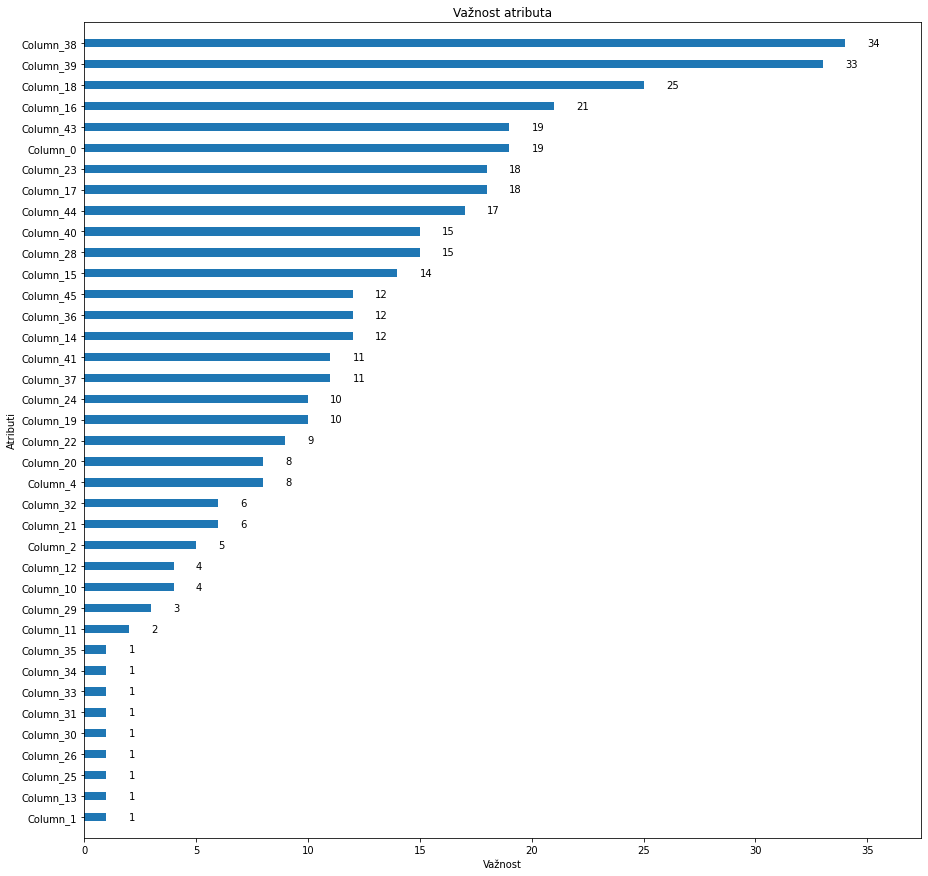

In [16]:
lgb.plot_importance(gbm, title = "Važnost atributa", xlabel="Važnost", ylabel="Atributi", figsize=(15,15), height = 0.4, grid = False)


Kada sve instance stavimo u istu grupu imamo nešto drugačije važnosti atributa.

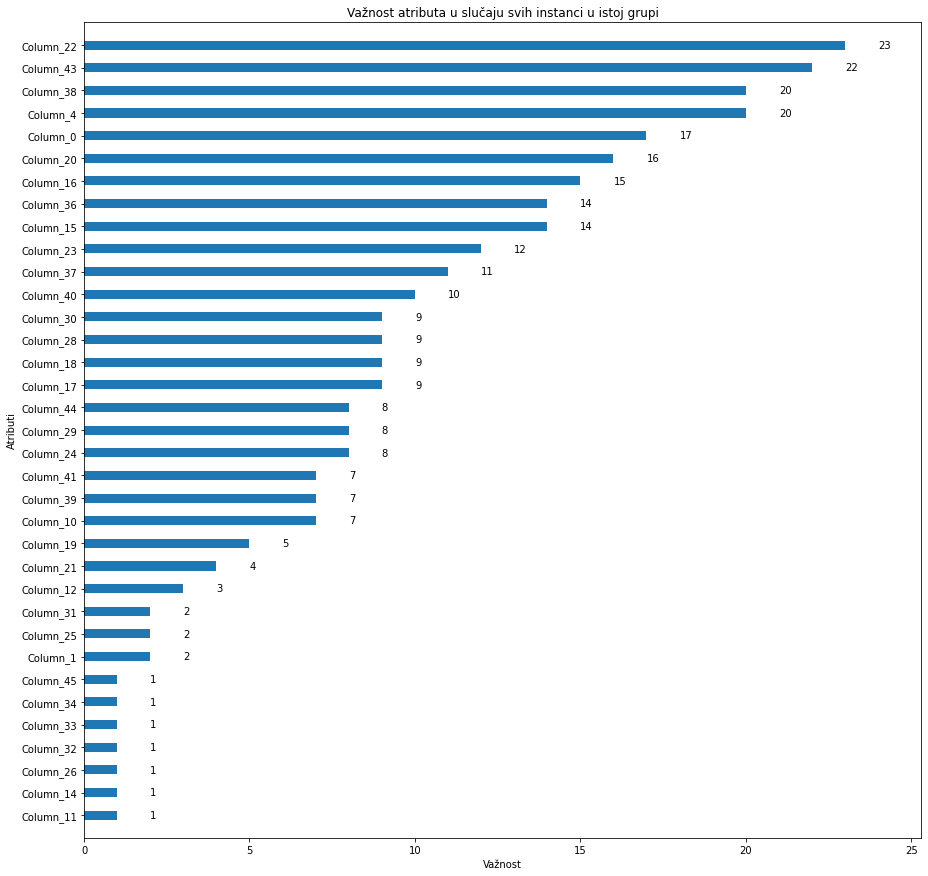

In [17]:
lgb.plot_importance(gbm2, title = "Važnost atributa u slučaju svih instanci u istoj grupi", xlabel="Važnost", ylabel="Atributi", figsize=(15,15), height = 0.4, grid = False)


Prikažimo sada dijagram jednog drveta.

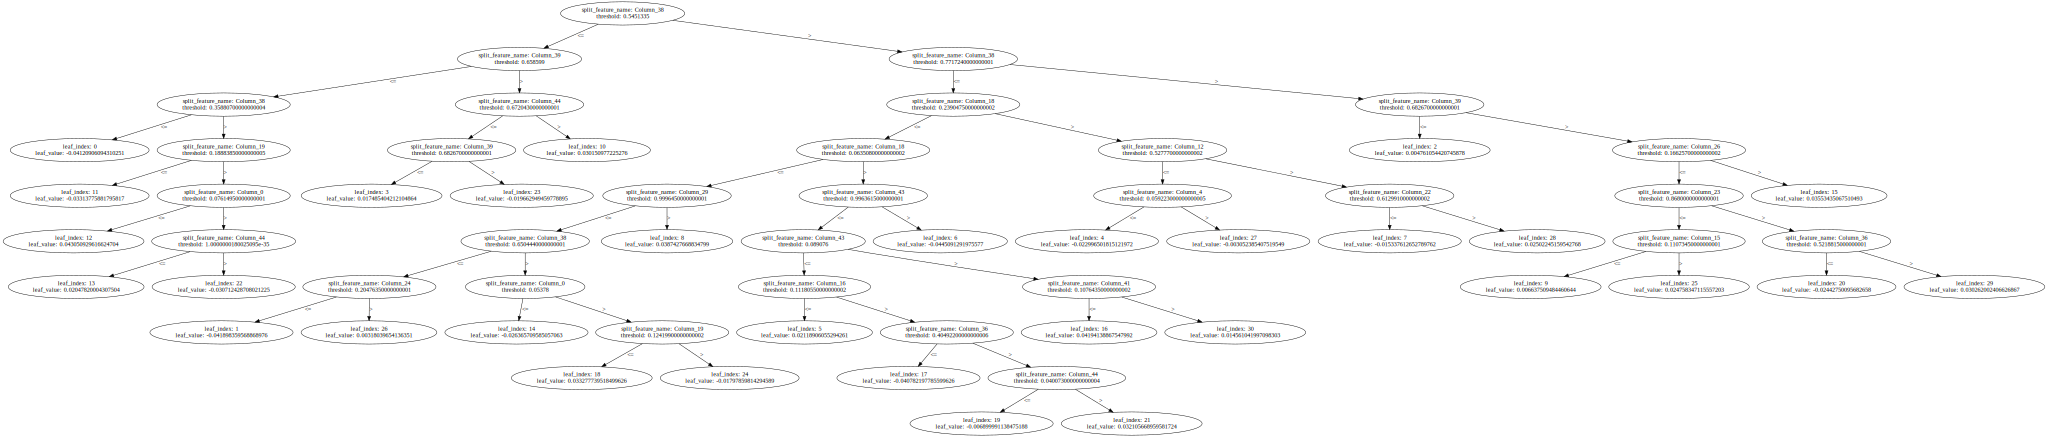

In [25]:
lgb.create_tree_digraph(gbm)

U modelu u kom su sve instance u istoj grupi situacija je drugačija.

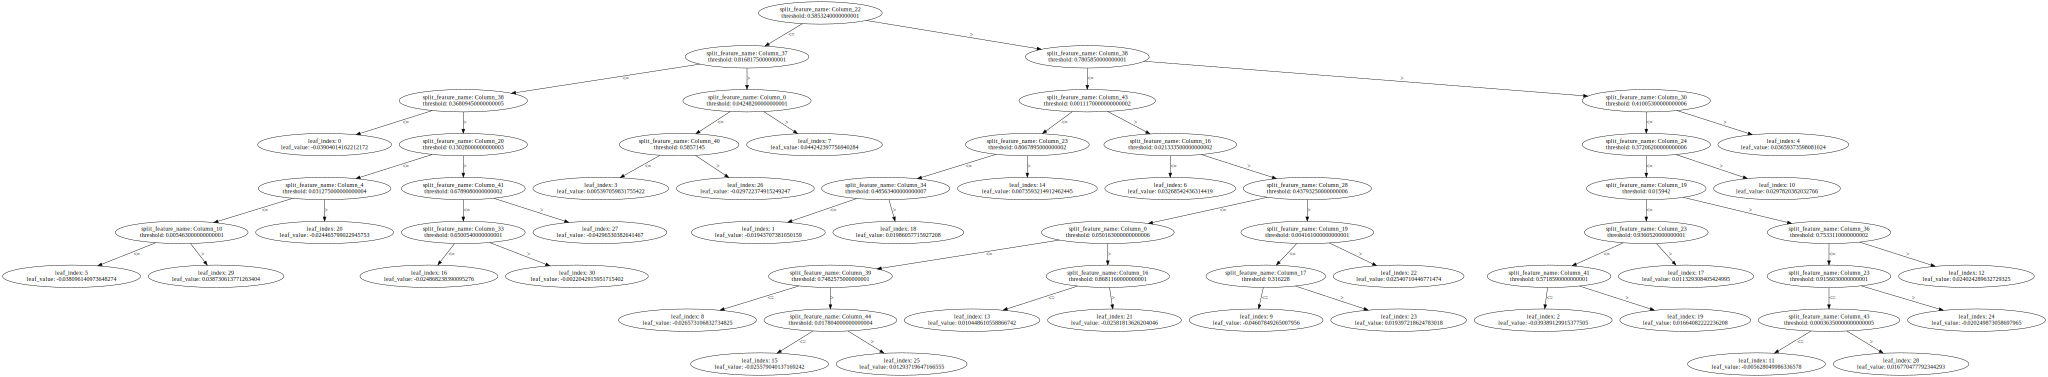

In [26]:
lgb.create_tree_digraph(gbm2)

Najbolja iteracija modela:

In [20]:
gbm.best_iteration_

13

In [21]:
gbm2.best_iteration_

10

Najbolji rezultat modela:

In [22]:
gbm.best_score_

defaultdict(dict,
            {'valid_0': {'ndcg@1': 0.6411889596602973,
              'ndcg@3': 0.6888330999565413}})

In [23]:
gbm2.best_score_

defaultdict(dict,
            {'valid_0': {'ndcg@1': 0.3333333333333333,
              'ndcg@3': 0.4897595753409189}})

In [24]:
gbm.objective_

'lambdarank'